In [ ]:
!pip install datasets zstandard jsonlines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [ ]:
from tqdm import tqdm
import csv
import pandas as pd
import numpy as np
import torch
from datetime import datetime
from wordcloud import WordCloud
from datasets import load_dataset
from google.colab import files
from sentence_transformers import SentenceTransformer
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import DataFrameLoader

import matplotlib.pyplot as plt
import seaborn as sns
import pprint

# EDA

## ru_stackoverflow

https://huggingface.co/datasets/IlyaGusev/ru_stackoverflow

In [ ]:
dataset = load_dataset('IlyaGusev/ru_stackoverflow', split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.62k [00:00<?, ?B/s]

ru_stackoverflow.py:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

The repository for IlyaGusev/ru_stackoverflow contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/IlyaGusev/ru_stackoverflow.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


ru_stackoverflow.jsonl.zst:   0%|          | 0.00/670M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/437604 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['question_id', 'url', 'answer_count', 'text_html', 'text_markdown', 'score', 'title', 'tags', 'views', 'author', 'timestamp', 'comments', 'answers'],
    num_rows: 437604
})

In [ ]:
dataset = dataset.remove_columns(['comments', 'author', 'text_html', 'views'])

### Датасет вопросов

In [ ]:
df_questions = dataset.select_columns(['question_id', 'url', 'answer_count', 'text_markdown', 'score', 'title', 'tags', 'timestamp']).to_pandas()

# Обработка даты-времени
df_questions['date'] = pd.to_datetime(df_questions['timestamp'], unit='s', errors='coerce')
df_questions.drop(columns=['timestamp'], inplace=True)

# Удалим вопросы без ответов
df_questions = df_questions[df_questions['answer_count'] != 0]

df_questions.head()

,question_id,url,answer_count,text_markdown,score,title,tags,date
0,534444,https://ru.stackoverflow.com/questions/534444,1,Какой паттерн можно применить для улучшения по...,1,Какой паттерн можно применить?,"[java, шаблоны-проектирования]",2016-06-13 02:34:48
1,1114570,https://ru.stackoverflow.com/questions/1114570,1,[code]\n #include <iostream>\n using nam...,0,"Не выводится список, думаю проблема в добавлен...",[c++],2020-04-23 12:34:45
2,597478,https://ru.stackoverflow.com/questions/597478,3,"Понятно, что большинство (если не все) крупные...",5,Как происходит взаимодействие нескольких языко...,[любой-язык],2016-11-29 20:06:10
4,11235,https://ru.stackoverflow.com/questions/11235,4,"Добрый день, у меня есть структура\n[code]\n ...",2,"Извлечение из файла, запись в файл","[c++, сериализация]",2011-04-19 09:28:09
5,426563,https://ru.stackoverflow.com/questions/426563,1,Есть подобный скрипт:\n[code]\n var output ...,0,Слэши и ковычки после использования stringify,"[javascript, json]",2015-05-27 16:39:26


In [ ]:
print("Количество строк с пропусками в датасете вопросов:", df_questions.isna().any(axis=1).sum())

Количество строк с пропусками в датасете вопросов: 0


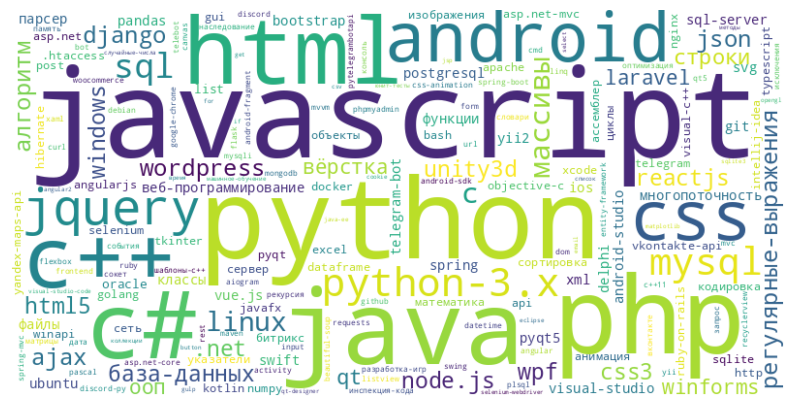

In [ ]:
# Облако тэгов
df_tags_exploded = df_questions.explode('tags')
tag_counts = df_tags_exploded['tags'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tag_counts.head(10)

,count
tags,
javascript,51994
python,43085
php,39600
java,36614
c#,29389
html,28882
c++,24597
android,23682
css,23573


In [ ]:
import re
pattern = re.compile(r".*python.*")

In [ ]:
for text in list(tag_counts.index):
    if pattern.fullmatch(text):
      print(text)

python
python-3.x
python-2.x
python-3.6
python-3.5
python-2.7
python-3.7
python-3.8
python-telegram-bot
python-import
pythonanywhere
python-3.9
python-faq
wxpython
python-docx
python-3.10
python-unittest
python-keyboard
ipython
python-internals
micropython
python-c-api
python-3.2
ironpython
boost.python
python-click
biopython
pythonnet
python-rich
python-mpv
circuitpython
python-httpx
python-mode
qpython


Оставим в датасете вопросы-ответы относящиеся только к python.

In [ ]:
# Фильтрация вопросов, в тегах которых встречается .*python.*
df_questions_py = df_questions[df_questions['tags'].apply(lambda tags: any(re.match(pattern, tag) for tag in tags))]

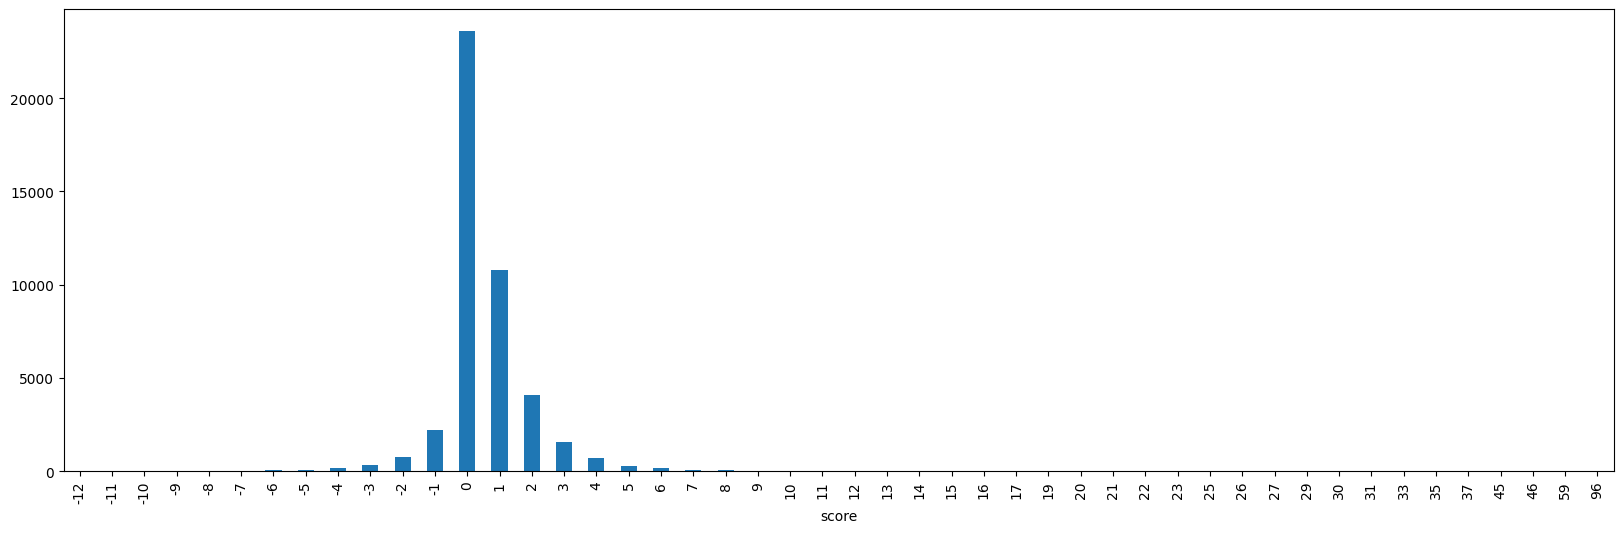

In [ ]:
df_questions_py['score'].value_counts().sort_index().plot(kind="bar", figsize=(20, 6));

In [ ]:
df_questions_py[df_questions['score'] < -5].head()

<ipython-input-15-ad677c6cedf9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_questions_py[df_questions['score'] < -5].head()


,question_id,url,answer_count,text_markdown,score,title,tags,date
769,599706,https://ru.stackoverflow.com/questions/599706,4,"Ввести с клавиатуры список, содержащий 10 элем...",-6,Задание по спискам (python),"[python, списки]",2016-12-05 07:25:43
5665,1313069,https://ru.stackoverflow.com/questions/1313069,2,Надо выполнить простейшую вычислительную опера...,-6,Python не распознаёт десятичные числа,"[python, python-3.x, числа]",2021-08-01 17:34:19
6012,1167308,https://ru.stackoverflow.com/questions/1167308,1,Пишу игру на пайтоне (про казино). В одном мом...,-6,Проблема с else,"[python, python-3.x, if]",2020-08-18 08:10:53
14616,616837,https://ru.stackoverflow.com/questions/616837,1,"Что можно оптимизировать в данной программе, н...",-6,"Оптимизация программы, которая находит все про...","[python, алгоритм, оптимизация, инспекция-кода]",2017-01-19 12:06:43
38640,1460673,https://ru.stackoverflow.com/questions/1460673,1,"Изучаю Python, и тут беда: Даны натуральные чи...",-6,Циклы и разветвления,"[python, python-3.10]",2022-10-26 11:45:31


Вопросы с рейтингом score < -5 можно отфильтровать - Stack Overflow закрывает их обсуждение, т.к. эти вопросы не несут пользы.

In [ ]:
# Оставляем только строки, где score >= -5
df_questions_py = df_questions_py[df_questions_py['score'] >= -5]

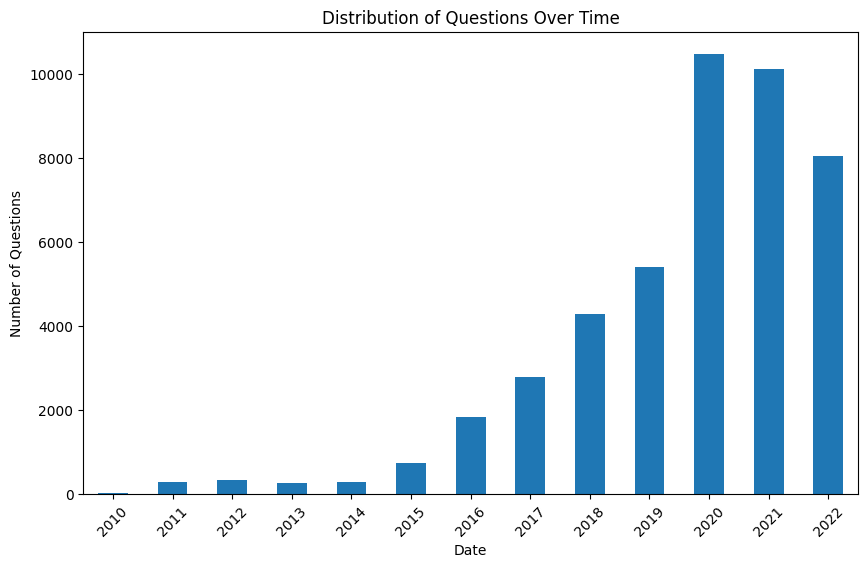

In [ ]:
# Распределение кол-ва вопросов по времени
df_questions_py = df_questions_py.copy()
df_questions_py['year'] = df_questions_py['date'].dt.year
df_questions_py['year'].value_counts().sort_index().plot(kind="bar", figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.title('Distribution of Questions Over Time')
plt.xticks(rotation=45)
plt.show();

df_questions_py.drop(columns=['year'], inplace=True)

Average Character Length: 1276
Average Word Length: 123


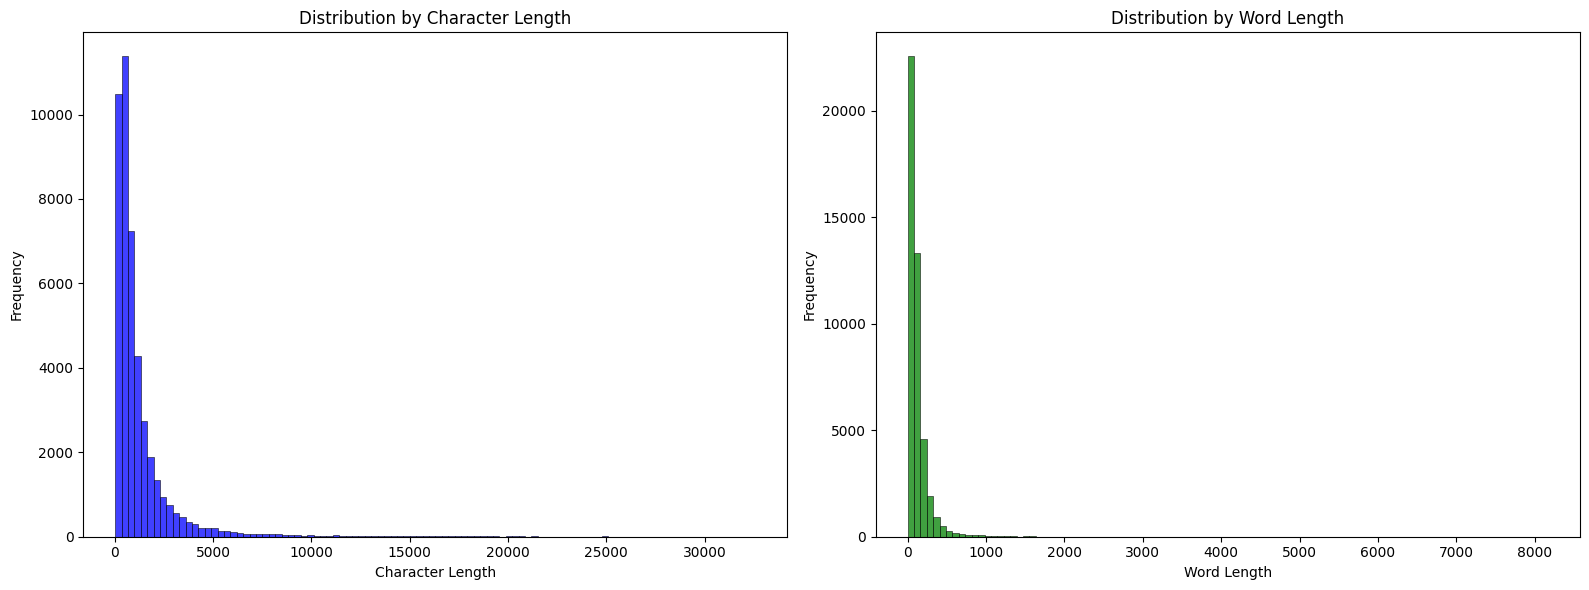

In [ ]:
def analyze_lengths(df):
    # Копируем DataFrame для сохранения исходных данных
    df = df.copy()

    # Вычисляем длины вопросов в символах и словах
    df['char_length'] = df['text_markdown'].apply(len)
    df['word_length'] = df['text_markdown'].apply(lambda x: len(x.split()))

    avg_char_length = round(df['char_length'].mean())
    avg_word_length = round(df['word_length'].mean())
    print(f"Average Character Length: {avg_char_length}")
    print(f"Average Word Length: {avg_word_length}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # Гистограмма распределения символов
    sns.histplot(df['char_length'], bins=100, color="blue", ax=axes[0])
    axes[0].set_title("Distribution by Character Length")
    axes[0].set_xlabel("Character Length")
    axes[0].set_ylabel("Frequency")

    # Гистограмма распределения слов
    sns.histplot(df['word_length'], bins=100, color="green", ax=axes[1])
    axes[1].set_title("Distribution by Word Length")
    axes[1].set_xlabel("Word Length")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

analyze_lengths(df_questions_py)

In [ ]:
# # Функция для обрезки текста
# def truncate_text(text):
#     words = text.split()
#     if len(words) > 600:
#         text = ' '.join(words[:600])
#     if len(text) > 6000:
#         return text[:6000]
#     return text

# # Обрежем вопросы до 600 слов и до 6 тыс. знаков (~1200 токенов)
# df_questions_py.loc[:, 'text_markdown'] = df_questions_py['text_markdown'].apply(truncate_text)

In [ ]:
# analyze_lengths(df_questions_py)

In [ ]:
print("Всего вопросов в датасете:", len(df_questions_py))

Всего вопросов в датасете: 44863


### Датасет ответов

In [ ]:
answers = pd.DataFrame(dataset['answers'])
df_answers = pd.concat([df_questions_py['question_id'], answers], axis=1, join='inner')

# Распаковка списков в строки
df_answers_unflattened = df_answers.explode(list(answers.columns))

In [ ]:
print("Количество строк с пропусками в датасете ответов:", df_answers_unflattened.isna().any(axis=1).sum())

Количество строк с пропусками в датасете ответов: 0


In [ ]:
# Обработка NaN
df_answers_unflattened = df_answers_unflattened.dropna()

# Обработка даты-времени
df_answers_unflattened['date'] = pd.to_datetime(df_answers_unflattened['timestamp'], unit='s', errors='coerce')
df_answers_unflattened.drop(columns=['timestamp'], inplace=True)

In [ ]:
df_answers_unflattened.drop(columns=['comments', 'author', 'text_html'], inplace=True)
df_answers_unflattened.head()

,question_id,answer_id,is_accepted,text_markdown,score,date
6,1246390,1246391,1,>\n[code]\n> if equality:\n> retur...,5,2021-02-19 22:13:19
12,1276841,1276859,1,Нельзя использовать в основном потоке ни `whil...,1,2021-04-30 16:40:00
12,1276841,1276844,0,[code]\n while(True):\n self.sta...,0,2021-04-30 15:45:03
21,928430,930570,1,Делать нужно так:\n 1. Указываем `ref` в `<l-...,0,2019-01-10 14:20:39
49,1454915,1454923,1,"Не знаете длину, используйте цикл:\n[code]\n ...",2,2022-10-07 13:56:59


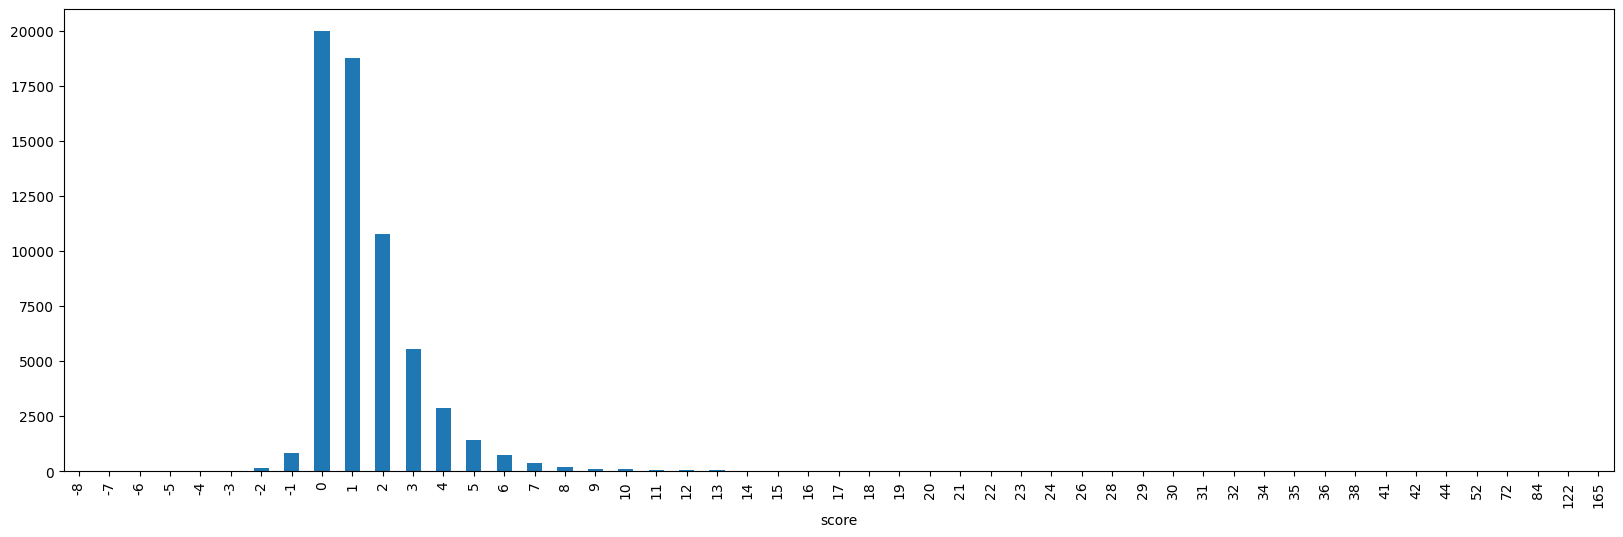

In [ ]:
df_answers_unflattened['score'].value_counts().sort_index().plot(kind="bar", figsize=(20, 6));

Имеет смысл убрать ответы с рейтингом score < 0 ("Ответ не является полезным").

In [ ]:
# Оставляем ответы с рейтингом не меньше 0
df_answers_unflattened = df_answers_unflattened[df_answers_unflattened['score'] >= 0]

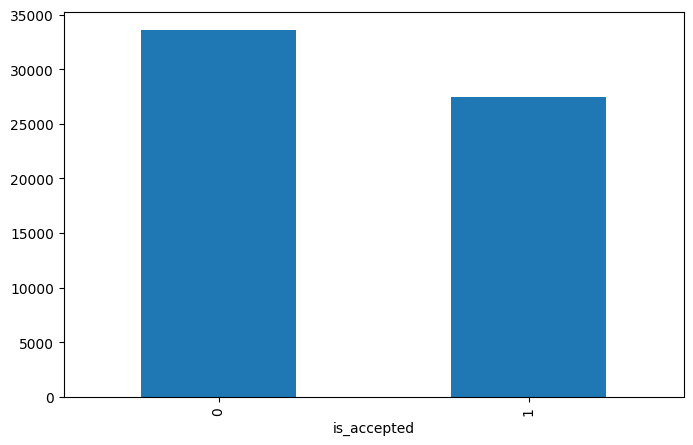

In [ ]:
df_answers_unflattened['is_accepted'].value_counts().sort_index().plot(kind="bar", figsize=(8, 5));

Average Character Length: 871
Average Word Length: 90


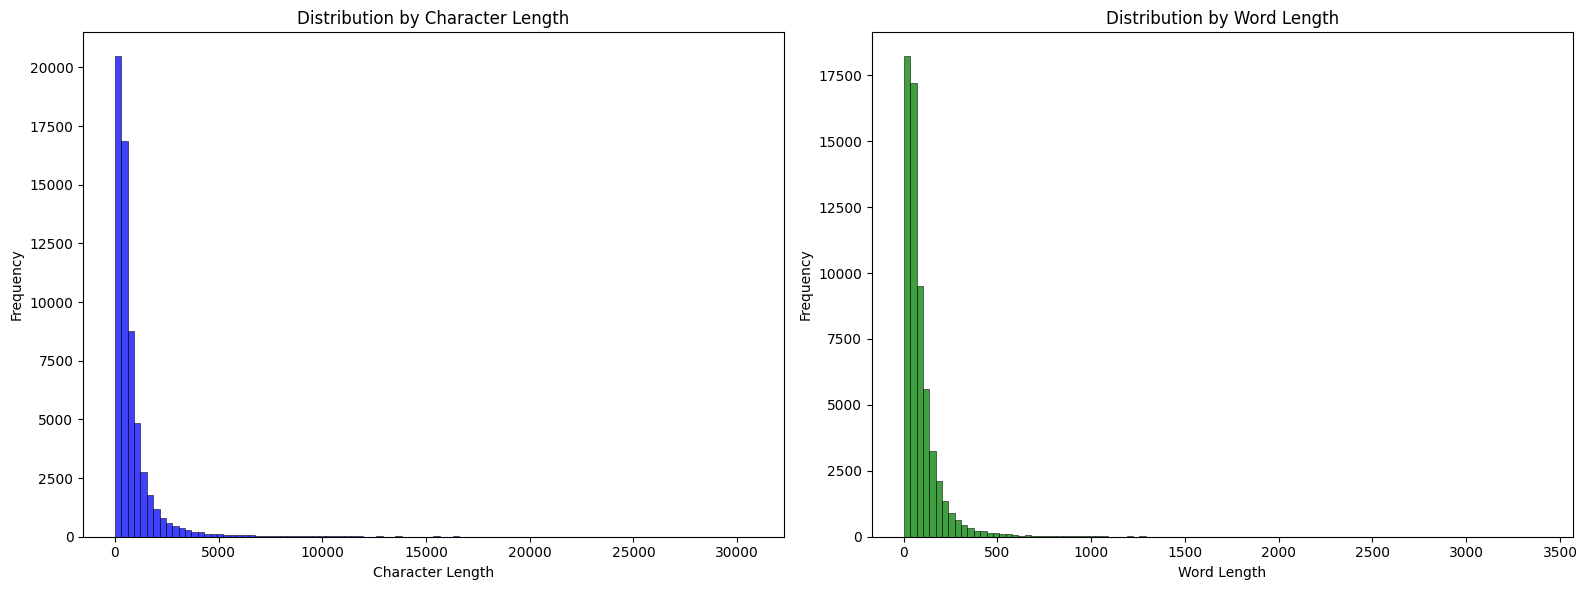

In [ ]:
analyze_lengths(df_answers_unflattened)

In [ ]:
# # Обрежем ответы до 600 слов и до 6 тыс. знаков (~1200 токенов)
# df_answers_unflattened.loc[:, 'text_markdown'] = df_answers_unflattened['text_markdown'].apply(truncate_text)

In [ ]:
# analyze_lengths(df_answers_unflattened)

In [ ]:
print("Всего ответов в датасете:", len(df_answers_unflattened))

Всего ответов в датасете: 61043


### DataFrameLoader

In [ ]:
# Преобразуем дату в строковое представление
df_answers_unflattened['date'] = df_answers_unflattened['date'].astype(str)
df_questions_py['date'] = df_questions_py['date'].astype(str)

In [ ]:
df_answers_grouped = df_answers_unflattened.groupby("question_id").agg(list).reset_index()
df_answers_grouped.head()

,question_id,answer_id,is_accepted,text_markdown,score,date
0,1,[2],[1],[[code]\n from smtplib import SMTP_SSL\n ...,[52],[2010-10-10 16:02:24]
1,63,[64],[1],[Нужно задать переменную окружения `http_proxy...,[0],[2010-10-13 10:28:06]
2,293,"[294, 979]","[1, 0]",[Нужно добавить в начало специальный комментар...,"[32, 7]","[2010-11-04 17:28:38, 2011-01-05 10:50:38]"
3,295,[296],[1],[При выполнении `makemessage` как `fuzzy` поме...,[9],[2010-11-05 14:46:33]
4,352,[353],[1],[Принципиально эти два способа эквивалентны. Р...,[4],[2010-11-23 13:16:50]


In [ ]:
df_answers_grouped['answer'] = df_answers_grouped.drop(columns=['question_id']).apply(lambda row: row.to_dict(), axis=1)
df_answers_grouped.drop(columns=['answer_id', 'is_accepted', 'text_markdown', 'score', 'date'], inplace=True)
df_answers_grouped.head()

,question_id,answer
0,1,"{'answer_id': [2], 'is_accepted': [1], 'text_m..."
1,63,"{'answer_id': [64], 'is_accepted': [1], 'text_..."
2,293,"{'answer_id': [294, 979], 'is_accepted': [1, 0..."
3,295,"{'answer_id': [296], 'is_accepted': [1], 'text..."
4,352,"{'answer_id': [353], 'is_accepted': [1], 'text..."


In [ ]:
result_df = pd.merge(df_questions_py, df_answers_grouped, on="question_id", how="left")
result_df.dropna(subset=['answer'], inplace=True)

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44504 entries, 0 to 44862
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question_id    44504 non-null  uint32
 1   url            44504 non-null  object
 2   answer_count   44504 non-null  uint32
 3   text_markdown  44504 non-null  object
 4   score          44504 non-null  int32 
 5   title          44504 non-null  object
 6   tags           44504 non-null  object
 7   date           44504 non-null  object
 8   answer         44504 non-null  object
dtypes: int32(1), object(6), uint32(2)
memory usage: 2.9+ MB


In [ ]:
result_df['question'] = result_df.apply(
    lambda row: f"{row['title']} | {' '.join(row['tags'])} | {row['text_markdown']}", axis=1
)
result_df.drop(columns=['title', 'tags', 'text_markdown'], inplace=True)
result_df.head()

,question_id,url,answer_count,score,date,answer,question
0,1246390,https://ru.stackoverflow.com/questions/1246390,1,2,2021-02-19 22:07:09,"{'answer_id': [1246391], 'is_accepted': [1], '...",Оптимизация поиска числа в списке | python опт...
1,1276841,https://ru.stackoverflow.com/questions/1276841,2,1,2021-04-30 15:39:49,"{'answer_id': [1276859, 1276844], 'is_accepted...",Не отвечает программа | python pyqt5 gui pyqt ...
2,928430,https://ru.stackoverflow.com/questions/928430,1,0,2019-01-04 15:20:17,"{'answer_id': [930570], 'is_accepted': [1], 't...","Django GIS и leaflet, как конвертировать zoom ..."
3,1454915,https://ru.stackoverflow.com/questions/1454915,2,0,2022-10-07 13:29:48,"{'answer_id': [1454923, 1454927], 'is_accepted...",последовательность операций над списком | pyth...
4,1136701,https://ru.stackoverflow.com/questions/1136701,1,1,2020-06-05 07:44:28,"{'answer_id': [1136756], 'is_accepted': [1], '...",Python. Вставка jpeg фоном в окно | python изо...


In [ ]:
import pickle

# Сохраняем df в pickle
result_df.to_pickle('result_df.pkl')

In [ ]:
files.download('/content/result_df.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loader = DataFrameLoader(result_df, page_content_column='question')
docs = loader.load()

print(f"loaded {len(docs)} documents")
print(docs[0].page_content)
pprint.pprint(docs[0].metadata)

loaded 44504 documents
Оптимизация поиска числа в списке | python оптимизация | Есть функция. Она принимает число от 1 до 9 (мы ищем, есть ли оно в списке), и список, в котором мы его ищем)
[code]
    def is_number_already_in(number, line):
        equality = False
        for i in line:
            if i == number:
                equality = True
        if equality:
            return True
        else:
            return False
[/code]
Как можно этот код оптимизировать и как называется способ (тема) оптимизации, чтобы я мог загуглить
Только не через лямбду, пожалуйста)
{'answer': {'answer_id': [1246391],
            'date': ['2021-02-19 22:13:19'],
            'is_accepted': [1],
            'score': [5],
            'text_markdown': ['>\n'
                              '[code]\n'
                              '>     if equality:\n'
                              '>         return True\n'
                              '>     else:\n'
                              '>         return Fals

# Embedder

In [ ]:
##################### Download an embedding model #####################
# Initialize torch settings for device-agnostic code.
N_GPU = torch.cuda.device_count()
DEVICE = torch.device(f'cuda:0' if torch.cuda.is_available() and N_GPU > 0 else 'cpu')

# Download the model from huggingface model hub.
model_name = "BAAI/bge-m3"
encoder = SentenceTransformer(model_name, device=DEVICE)

# Get the model parameters and save for later.
EMBEDDING_DIM = encoder.get_sentence_embedding_dimension()
MAX_SEQ_LENGTH_IN_TOKENS = encoder.get_max_seq_length()

# Inspect model parameters.
print(f"model_name: {model_name}")
print(f"EMBEDDING_DIM: {EMBEDDING_DIM}")
print(f"MAX_SEQ_LENGTH: {MAX_SEQ_LENGTH_IN_TOKENS}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

model_name: BAAI/bge-m3
EMBEDDING_DIM: 1024
MAX_SEQ_LENGTH: 8192


In [ ]:
##################### Chunk and encode your custom data as vectors #####################
CHUNK_SIZE = 2000
chunk_overlap = np.round(CHUNK_SIZE * 0.10, 0)
print(f"chunk_size: {CHUNK_SIZE}, chunk_overlap: {chunk_overlap}")

# Define the splitter.
child_splitter = RecursiveCharacterTextSplitter(
   chunk_size=CHUNK_SIZE,
   chunk_overlap=chunk_overlap)

# Chunk the docs.
chunks = child_splitter.split_documents(docs)
print(f"{len(docs)} docs split into {len(chunks)} child documents.")

# Encoder input is doc.page_content as strings.
list_of_strings = [doc.page_content for doc in chunks if hasattr(doc, 'page_content')]

# Embedding inference using HuggingFace encoder.
# embeddings = torch.tensor(encoder.encode(list_of_strings))
batch_size = 1024
embeddings = []

for i in tqdm(range(0, len(list_of_strings), batch_size), desc="Encoding embeddings"):
    batch = list_of_strings[i:i + batch_size]
    batch_embeddings = encoder.encode(batch, convert_to_tensor=True, device=DEVICE, normalize_embeddings=True)
    embeddings.append(batch_embeddings)

# Собираем в один тензор
embeddings = torch.cat(embeddings)
embeddings_cpu = embeddings.cpu()

# # Normalize the embeddings.
# embeddings_np = np.array(embeddings_cpu / np.linalg.norm(embeddings_cpu))

# Milvus expects a list of `numpy.ndarray` of `numpy.float32` numbers.
converted_values = list(map(np.float32, embeddings_cpu))

chunk_size: 2000, chunk_overlap: 200.0
44504 docs split into 58962 child documents.


Encoding embeddings:  14%|█▍        | 8/58 [11:40<1:10:13, 84.28s/it]

In [ ]:
# Create dict_list for Milvus insertion.
dict_list = []
for idx, (chunk, vector) in enumerate(zip(chunks, converted_values)):
   # Assemble embedding vector, original text chunk, metadata.
   chunk_dict = {
       'chunk_id': idx,
       'chunk': chunk.page_content,
       'question_id': chunk.metadata.get('question_id', ""),
       'url': chunk.metadata.get('url', ""),
       'answer_count': chunk.metadata.get('answer_count', ""),
       'score': chunk.metadata.get('score', ""),
       'date': chunk.metadata.get('date', ""),
       'vector': vector,
       'answer': chunk.metadata.get('answer', ""),
   }
   dict_list.append(chunk_dict)

### Save embeddings in pickle file

In [ ]:
import pickle

# Сохраняем в pickle
with open('data.pkl', 'wb') as f:
    pickle.dump(dict_list, f)

In [ ]:
# Загрузка данных из pickle
with open('data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Убедимся, что тип загруженных данных — словарь
print(type(loaded_data))  # <class 'dict'>
pprint.pprint(loaded_data[0])

In [ ]:
files.download('/content/data.pkl')